In [56]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set_context("notebook")
import matplotlib.pyplot as plt

In [57]:
# Clean data, create column for stanley cup winners, 1 for winner and 0 for non-winner
team_data = pd.read_csv('project_dataset.csv', na_values = '--')
# Replace NA Values with 0
team_data['T'].fillna(0, inplace=True)
team_data['OT'].fillna(0, inplace=True)
# Create column for stanley cup winners. 1 = Won cup, 0 = Did not win cup
team_data['Cup'] = np.zeros(len(team_data))
team_data.iloc[684,24] = 1
team_data.iloc[174,24] = 1
team_data.iloc[614,24] = 1
team_data.iloc[609,24] = 1
team_data.iloc[593,24] = 1
team_data.iloc[687,24] = 1
team_data.iloc[550,24] = 1
team_data.iloc[545,24] = 1
team_data.iloc[153,24] = 1
team_data.iloc[311,24] = 1
team_data.iloc[163,24] = 1
team_data.iloc[328,24] = 1
team_data.iloc[56,24] = 1
team_data.iloc[150,24] = 1
team_data.iloc[552,24] = 1
team_data.iloc[255,24] = 1
team_data.iloc[3,24] = 1
team_data.iloc[125,24] = 1
team_data.iloc[628,24] = 1
team_data.iloc[411,24] = 1
team_data.iloc[244,24] = 1
team_data.iloc[179,24] = 1
team_data.iloc[404,24] = 1
team_data.iloc[227,24] = 1
# Remove all data where games played is not 82
team_data = team_data[team_data['GP']==82]

In [58]:
# Create model to try to predict stanley cup winner using all predictive variables, very unsuccessful
sc_model = sm.OLS(team_data['Cup'], sm.add_constant(team_data.iloc[:,4:24]))
results = sc_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Cup   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.574
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000518
Time:                        19:40:49   Log-Likelihood:                 209.10
No. Observations:                 629   AIC:                            -382.2
Df Residuals:                     611   BIC:                            -302.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.001     -1.589      0.1

In [59]:
# Create model to try to predict points using predictive variables
my_list = [13,14] + list(range(19,24))
point_model = sm.OLS(team_data['P'], sm.add_constant(team_data.iloc[:,my_list]))
results = point_model.fit()
print(results.summary())

# Directly avoiding all variables which may be directly correlated with points, such as Losses, wins, regulation wins, and S/O wins
# Removed Goals for and goals against as those are already accounted for in GF/GP and GA/GP

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     892.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.45e-319
Time:                        19:40:51   Log-Likelihood:                -1856.0
No. Observations:                 629   AIC:                             3728.
Df Residuals:                     621   BIC:                             3764.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.0381      9.734      9.866      0.0

In [60]:
reduced_point_model = sm.OLS(team_data['P'], sm.add_constant(team_data.iloc[:,[13,14,20,21,22,23]]))
results = reduced_point_model.fit()
print(results.summary())
# Reduce model to variables from previous model which have P > |t| of less than .05

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1042.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.42e-320
Time:                        19:40:52   Log-Likelihood:                -1856.3
No. Observations:                 629   AIC:                             3727.
Df Residuals:                     622   BIC:                             3758.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7107      9.696      9.974      0.0

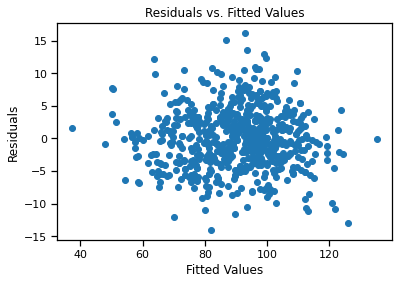

In [61]:
# Create chart plotting residuals vs fitted values based on model
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [65]:
current_data = pd.read_csv('23-24_dataset.csv')
current_data.head(5)

,Team,Season,GP,W,L,T,OT,P,P%,RW,...,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,Dallas Stars,20232024,22,14,5,--,3,31,0.705,11,...,61,3.55,2.77,22.7,88.5,18.2,96.2,29.9,31.9,52.3
1,Los Angeles Kings,20232024,21,14,4,--,3,31,0.738,14,...,48,3.86,2.29,19.7,89.7,15.8,95.6,32.7,26.8,50.2
2,Philadelphia Flyers,20232024,24,12,10,--,2,26,0.542,9,...,69,2.92,2.88,12.4,84.8,11.1,92.4,32.8,27.9,46.2
3,Vegas Golden Knights,20232024,25,16,5,--,4,36,0.720,12,...,58,3.16,2.32,21.4,86.5,20.2,91.9,31.9,29.5,50.7
4,Colorado Avalanche,20232024,24,15,7,--,2,32,0.667,14,...,70,3.58,2.92,20.2,85.6,16.0,91.1,31.8,29.1,47.4


In [66]:
pred_vars = sm.add_constant(current_data.iloc[:,[12,13,19,20,21,22]])
pred_vars.head(5)

,const,GF,GA,Net PK%,Shots/GP,SA/GP,FOW%
0,1.0,78,61,96.2,29.9,31.9,52.3
1,1.0,81,48,95.6,32.7,26.8,50.2
2,1.0,70,69,92.4,32.8,27.9,46.2
3,1.0,79,58,91.9,31.9,29.5,50.7
4,1.0,86,70,91.1,31.8,29.1,47.4


In [67]:
predictions = results.predict(pred_vars)

max_prediction_index = np.argmax(predictions)
max_prediction_value = predictions[max_prediction_index]

print("Max Prediction Value:", max_prediction_value)
print("Team of Max Prediction:", current_data.iloc[max_prediction_index,0])
max_prediction_index

Max Prediction Value: 109.4313421690698
Team of Max Prediction: Vancouver Canucks


21